In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns
from collections import Counter

In [2]:
df = pd.read_csv('german-nouns.csv', low_memory=False)

In [3]:
df.shape

(102444, 79)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102444 entries, 0 to 102443
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   lemma                        102443 non-null  object
 1   pos                          102444 non-null  object
 2   genus                        92060 non-null   object
 3   genus 1                      1342 non-null    object
 4   genus 2                      1352 non-null    object
 5   genus 3                      47 non-null      object
 6   genus 4                      1 non-null       object
 7   nominativ singular           90030 non-null   object
 8   nominativ singular*          3 non-null       object
 9   nominativ singular 1         1343 non-null    object
 10  nominativ singular 2         1353 non-null    object
 11  nominativ singular 3         47 non-null      object
 12  nominativ singular 4         1 non-null       object
 13  nominativ sing

In [5]:
df.head()

,lemma,pos,genus,genus 1,genus 2,genus 3,genus 4,nominativ singular,nominativ singular*,nominativ singular 1,...,akkusativ singular gemischt,akkusativ plural,akkusativ plural*,akkusativ plural 1,akkusativ plural 2,akkusativ plural 3,akkusativ plural 4,akkusativ plural stark,akkusativ plural schwach,akkusativ plural gemischt
0,-algie,"Gebundenes Lexem,Substantiv",f,NaN,NaN,NaN,NaN,-algie,NaN,NaN,...,NaN,-algien,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-ant,"Affix,Substantiv,Suffix",NaN,m,n,NaN,NaN,NaN,NaN,-ant,...,NaN,NaN,NaN,-anten,-ante,NaN,NaN,NaN,NaN,NaN
2,-anz,"Affix,Substantiv,Suffix",f,NaN,NaN,NaN,NaN,-anz,NaN,NaN,...,NaN,-anzen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-chen,"Affix,Substantiv,Suffix",n,NaN,NaN,NaN,NaN,-chen,NaN,NaN,...,NaN,-chen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-elchen,"Affix,Substantiv,Suffix",n,NaN,NaN,NaN,NaN,-elchen,NaN,NaN,...,NaN,-elchen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,lemma,pos,genus,genus 1,genus 2,genus 3,genus 4,nominativ singular,nominativ singular*,nominativ singular 1,...,akkusativ singular gemischt,akkusativ plural,akkusativ plural*,akkusativ plural 1,akkusativ plural 2,akkusativ plural 3,akkusativ plural 4,akkusativ plural stark,akkusativ plural schwach,akkusativ plural gemischt
102439,Ḫāriǧit,Substantiv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102440,’Ndrangheta,Substantiv,f,NaN,NaN,NaN,NaN,’Ndrangheta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102441,’Sgebengu,Substantiv,m,NaN,NaN,NaN,NaN,’Sgebengu,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102442,’s-Gravenhage,"Substantiv,Toponym",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102443,’s-Hertogenbosch,"Substantiv,Toponym",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The variables that are relevant here are lemma, pos, genus  
- lemma — word entry on the dictionary  
- pos — part of speech or grammatical category (e.g. noun, verb, adjective, pronoun, adverb)  
- genus — noun class or grammatical gender (masculine, feminine or neuter)  

In [8]:
df[['lemma', 'pos', 'genus']]

,lemma,pos,genus
0,-algie,"Gebundenes Lexem,Substantiv",f
1,-ant,"Affix,Substantiv,Suffix",NaN
2,-anz,"Affix,Substantiv,Suffix",f
3,-chen,"Affix,Substantiv,Suffix",n
4,-elchen,"Affix,Substantiv,Suffix",n
...,...,...,...
102439,Ḫāriǧit,Substantiv,NaN
102440,’Ndrangheta,Substantiv,f
102441,’Sgebengu,Substantiv,m
102442,’s-Gravenhage,"Substantiv,Toponym",NaN


In [9]:
df[['lemma', 'pos', 'genus']].to_csv('NomenDB.csv', index=False)

In [10]:
NomenDB = pd.read_csv('NomenDB.csv', low_memory=False)

In [11]:
NomenDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102444 entries, 0 to 102443
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   lemma   102443 non-null  object
 1   pos     102444 non-null  object
 2   genus   92060 non-null   object
dtypes: object(3)
memory usage: 2.3+ MB


In [12]:
NomenDB.nunique()

lemma    100063
pos          35
genus         3
dtype: int64

In [13]:
missing_counts = NomenDB.isna().sum()

# Filtering columns with and without missing values
with_null = missing_counts[missing_counts > 0].index.tolist()
without_nulls = missing_counts[missing_counts == 0].index.tolist()

print(f"{len(with_null)} columns with missing values:\n{with_null}\n\n"
      f"{len(without_nulls)} columns without missing values:\n{without_nulls}")

2 columns with missing values:
['lemma', 'genus']

1 columns without missing values:
['pos']


In [14]:
NomenDB.isna().sum().sort_values()

pos          0
lemma        1
genus    10384
dtype: int64

In [15]:
# Summary statistics for missing data
missing_summary = NomenDB.isna().sum().to_frame('Total Missing')
missing_summary['% Missing'] = (NomenDB.isna().mean() * 100).round(2)

# Filtering out columns without missing values
missing_summary = missing_summary[missing_summary['Total Missing'] > 0]

missing_summary_sorted = missing_summary.sort_values(by='% Missing')
print(missing_summary_sorted)

       Total Missing  % Missing
lemma              1       0.00
genus          10384      10.14


In [16]:
NomenDB = NomenDB.dropna()

In [17]:
NomenDB.nunique()

lemma    91022
pos         30
genus        3
dtype: int64

In [18]:
NomenDB['pos'].value_counts()

pos
Substantiv                                                                   87787
Substantiv,Toponym                                                             898
Substantiv,adjektivische Deklination                                           887
Substantiv,Wortverbindung,adjektivische Deklination                            885
Substantiv,Wortverbindung                                                      420
Eigenname,Substantiv                                                           317
Abkürzung,Substantiv                                                           294
Substantiv,Toponym,Wortverbindung                                              197
Substantiv,Toponym,Wortverbindung,adjektivische Deklination                    138
Eigenname,Substantiv,Wortverbindung,adjektivische Deklination                   42
Buchstabe,Substantiv,Symbol                                                     36
Eigenname,Straßenname,Substantiv                                                34


In [19]:
# Making 'genus' values more explicit
NomenDB['genus'].replace({'f': 'feminin', 'm': 'maskulin', 'n': 'neutral'}, inplace=True)

The entries on column 'lemma' are in need of some cleaning. Some compound nouns start with digits and some prefixes and suffixes are also included on our dataframe. We can make use of a regex to filter out entries starting with any character other than those the German alphabet includes (A-Z, a-z, Ä, ä, Ö, ö, Ü, ü, ß)

In [21]:
# Filter rows where 'lemma' starts with a valid German alphabet character
pattern = r'^[A-Za-zÄäÖöÜüß]'
NomenDB = NomenDB[NomenDB['lemma'].str.match(pattern)]

>r'^[A-Za-zÄäÖöÜüß]

- r' matches the characters r' literally (case sensitive)
- ^ asserts position at start of a line
- Then we match a single character present in the list [A-Za-zÄäÖöÜüß]
- A-Z refers to any character between A and Z (case sensitive)
- a-z refers to any character between a and z (case sensitive)
- ÄäÖöÜüß is a list that matches a single character in the list

In [23]:
genus_frequency = NomenDB['genus'].value_counts()
genus_percentage = NomenDB['genus'].value_counts(normalize=True) * 100
genus_stats = pd.DataFrame({'Frequency': genus_frequency, 'Percentage': genus_percentage.round(2)})
genus_stats

,Frequency,Percentage
genus,,
feminin,39582,43.10
maskulin,33593,36.58
neutral,18659,20.32


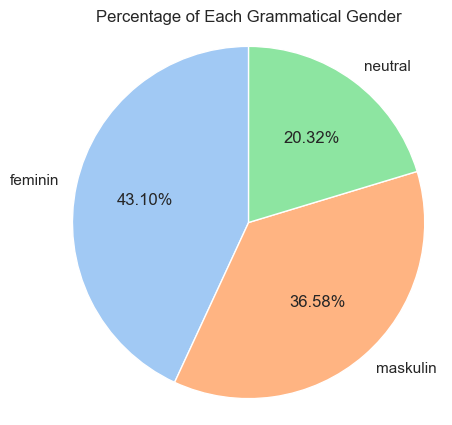

In [24]:
sns.set_theme(palette="pastel")
plt.figure(figsize=(5, 5))
plt.pie(genus_percentage, labels=genus_percentage.index, autopct='%1.2f%%', startangle=90)
plt.title('Percentage of Each Grammatical Gender')
plt.axis('equal')
plt.show()

Distribution of Grammatical Gender Across Parts of Speech:
- Create a bar chart showing the distribution of grammatical genders (genus) within each part of speech (pos).  

Length of Lemmas by Grammatical Gender:
- Analyze and visualize the average length of lemmas (words) for each grammatical gender. You could use a box plot or violin plot for this.  

Word Endings and Their Influence on Grammatical Gender:
- Investigate common suffixes for each grammatical gender and visualize the most frequent suffixes for masculine, feminine, and neuter nouns.  

Part of Speech Distribution:
- Create a bar chart showing the distribution of different parts of speech (pos) in your dataset.

In [26]:
# Get suffixes on a new variable through a function
def get_suffix(word, n=3):
    return word[-n:]

NomenDB['suffix'] = NomenDB['lemma'].apply(get_suffix)

In [27]:
suffix_counts = Counter(NomenDB['suffix'])
common_suffixes = suffix_counts.most_common(20)

In [28]:
suffix_df = pd.DataFrame(common_suffixes, columns=['suffix', 'count'])
suffix_df

,suffix,count
0,ung,5609
1,rin,3345
2,ter,2091
3,eit,1930
4,ion,1758
5,che,1112
6,hen,999
7,ler,959
8,cht,953
9,ger,856


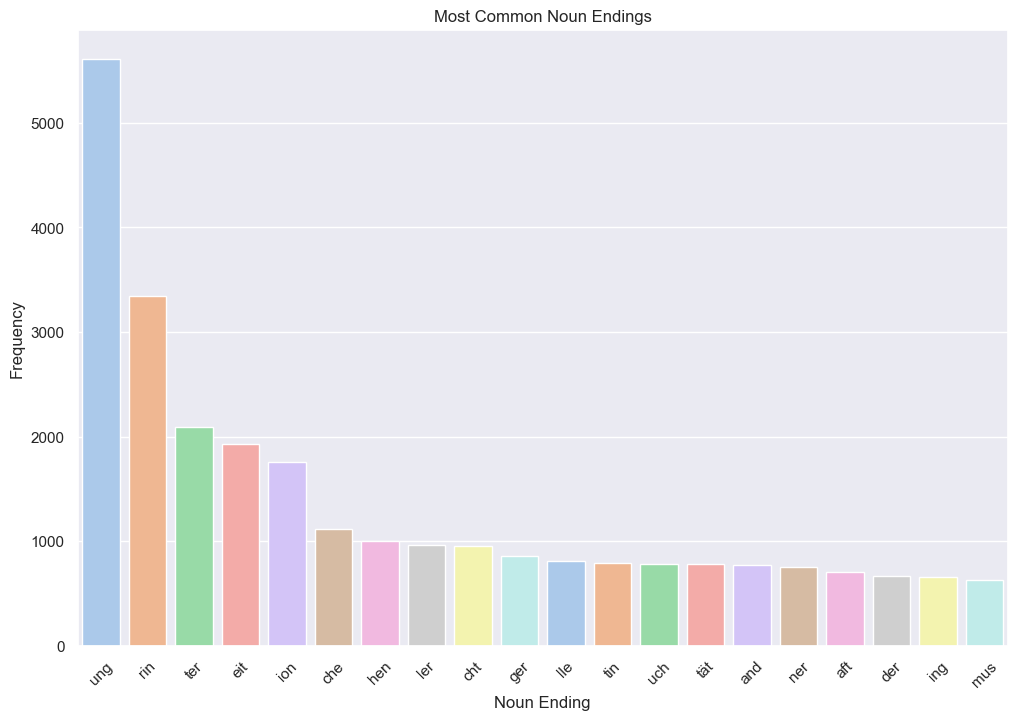

In [29]:
plt.figure(figsize=(12, 8))
sns.barplot(data=suffix_df, x='suffix', y='count', palette='pastel')
plt.title('Most Common Noun Endings')
plt.xlabel('Noun Ending')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

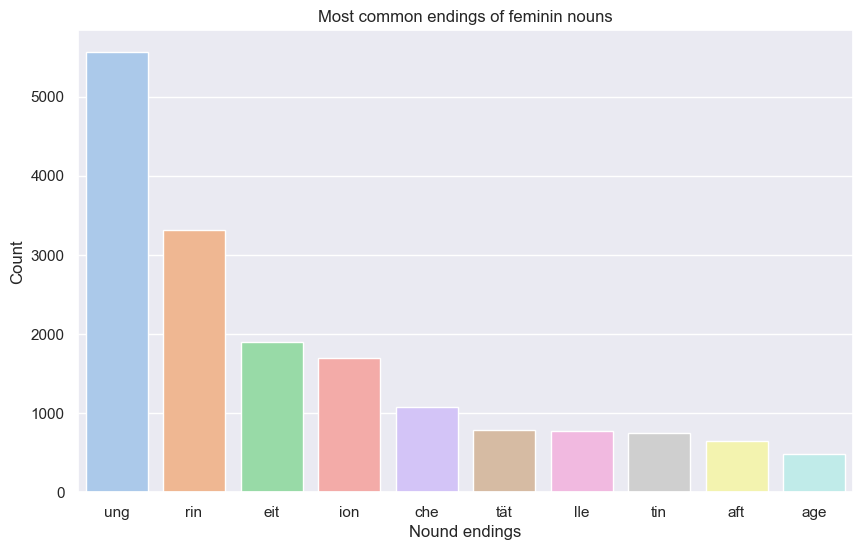

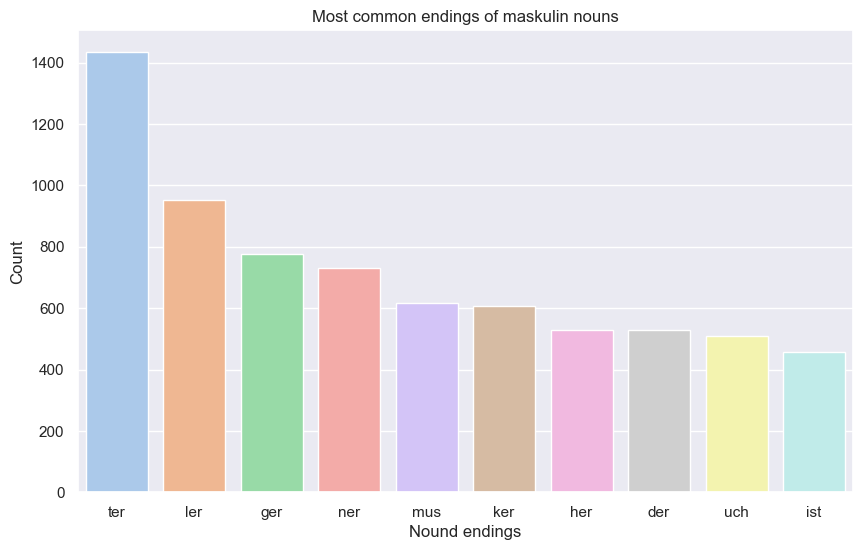

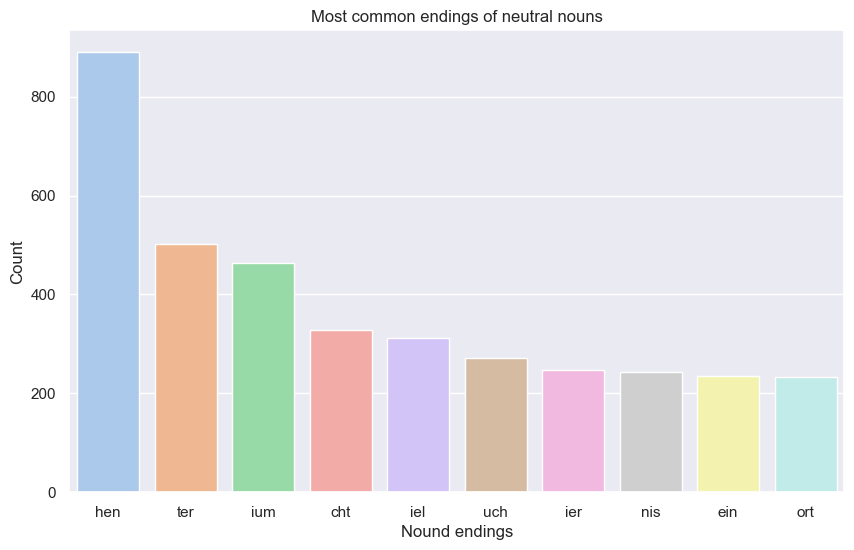

In [30]:
# Count most common suffixes for each genus
suffix_counts = NomenDB.groupby('genus')['suffix'].apply(lambda x: Counter(x).most_common(10)).reset_index()

# Visualize results
for genus in suffix_counts['genus'].unique():
    subset = suffix_counts[suffix_counts['genus'] == genus]
    suffixes, counts = zip(*subset['suffix'].values[0])
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(suffixes), y=list(counts), palette="pastel")
    plt.title(f'Most common endings of {genus} nouns')
    plt.xlabel('Nound endings')
    plt.ylabel('Count')
    plt.show()

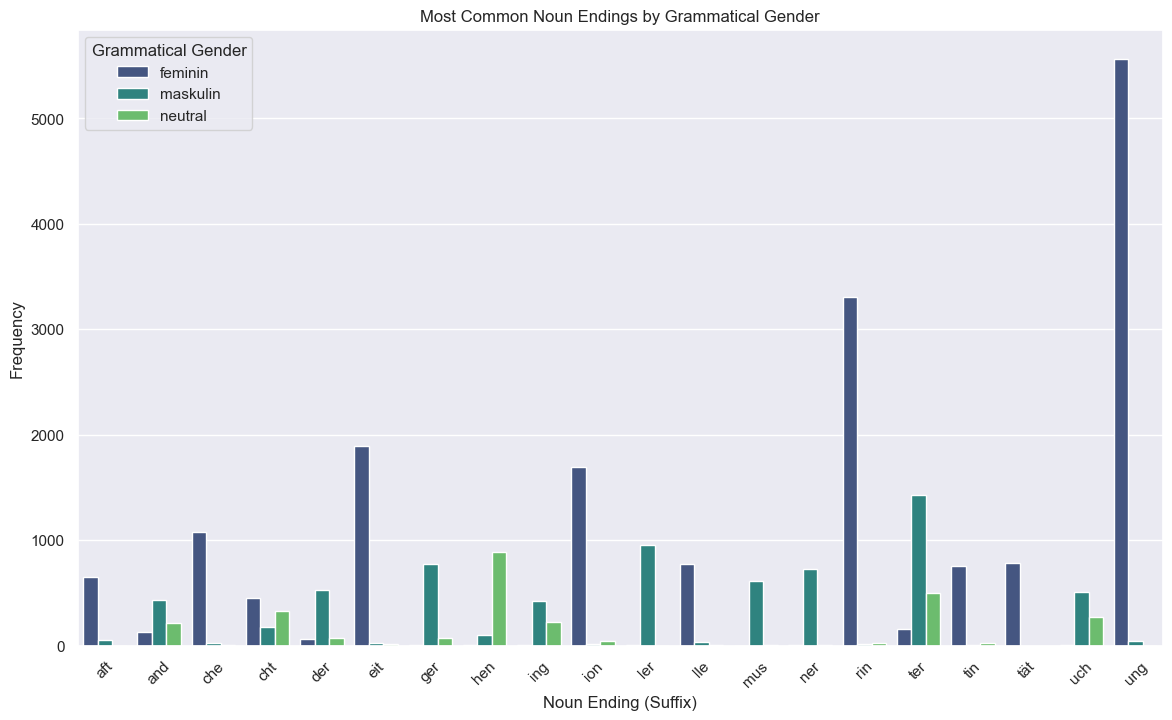

In [31]:
common_suffixes_df = pd.DataFrame(common_suffixes, columns=['suffix', 'count'])
filtered_df = NomenDB[NomenDB['suffix'].isin(common_suffixes_df['suffix'])]
suffix_genus_counts = filtered_df.groupby(['suffix', 'genus']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))
sns.barplot(data=suffix_genus_counts, x='suffix', y='count', hue='genus', palette='viridis')
plt.title('Most Common Noun Endings by Grammatical Gender')
plt.xlabel('Noun Ending (Suffix)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Grammatical Gender')
plt.show()

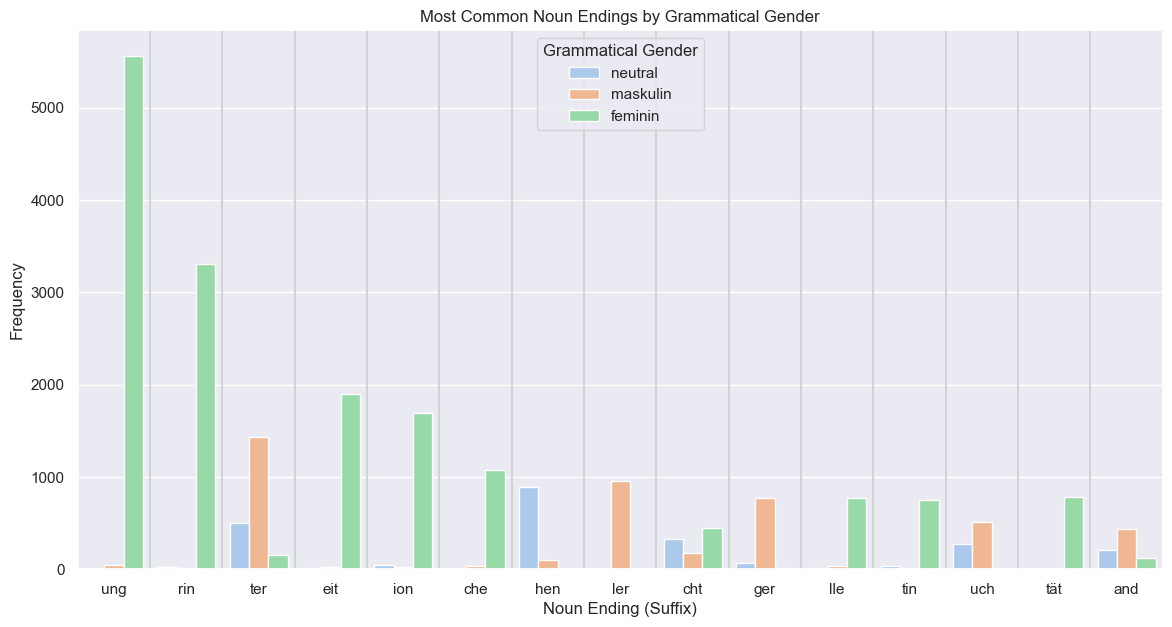

In [52]:
# Count the most common suffixes
suffix_counts = Counter(NomenDB['suffix'])
common_suffixes = suffix_counts.most_common(15)

# Create a DataFrame for the most common suffixes
common_suffixes_df = pd.DataFrame(common_suffixes, columns=['suffix', 'count'])

# Filter the original DataFrame for these common suffixes
filtered_df = NomenDB[NomenDB['suffix'].isin(common_suffixes_df['suffix'])]

# Count frequencies by suffix and genus
suffix_genus_counts['total_count'] = suffix_genus_counts.groupby('suffix')['count'].transform('sum')
suffix_genus_counts = suffix_genus_counts.sort_values(by='total_count', ascending=False)

# Plot the bar chart
plt.figure(figsize=(14, 7))
sns.barplot(data=suffix_genus_counts, x='suffix', y='count', hue='genus', palette='pastel')

# Adding vertical lines to separate the different noun endings
for i in range(len(common_suffixes_df) - 1):
    plt.axvline(i + 0.5, color='lightgrey', linestyle='-')

plt.title('Most Common Noun Endings by Grammatical Gender')
plt.xlabel('Noun Ending (Suffix)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Grammatical Gender')
plt.show()

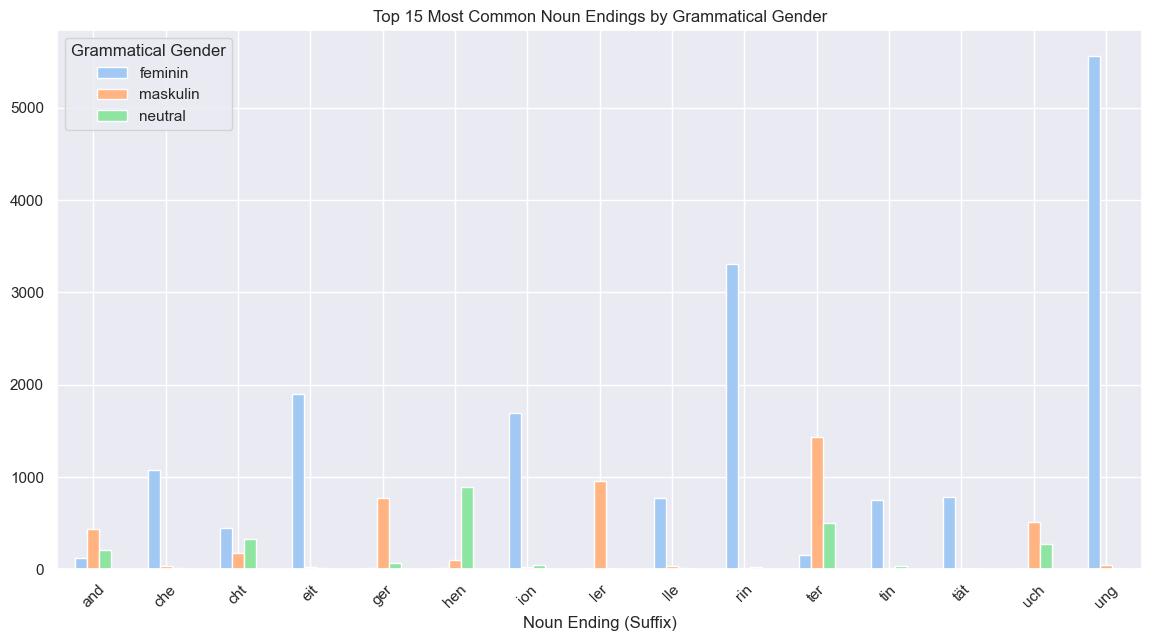

In [54]:
# Pivot the data to get a dataframe suitable for a stacked bar plot
pivot_df = suffix_genus_counts.pivot(index='suffix', columns='genus', values='count').fillna(0)

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=False, figsize=(14, 7))

plt.title('Top 15 Most Common Noun Endings by Grammatical Gender')
plt.xlabel('Noun Ending (Suffix)')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend(title='Grammatical Gender')
plt.show()